In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [4]:
data = pd.read_csv('AirPassengers.csv')
data.columns = ['month', 'n_passengers']
data = data.set_index('month')
data.index = pd.to_datetime(data.index)

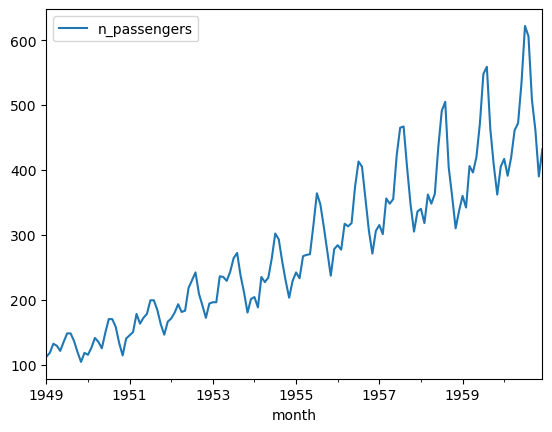

In [5]:
data.plot()
plt.show()

Check if the series is stationarity or is not with Dickey Fuller Test

In [6]:
test = adfuller(data)
test

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

if the p-value is > 0.05 then is not stationarity

In [7]:
test[1] <= 0.05

False

then the series is not stattionarity

**we need to make some changes**

for the variance we use log function

In [9]:
data_log = data.copy()
data_log['n_passengers'] = np.log(data.n_passengers)

In [10]:
data_log.head(3)

,n_passengers
month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802


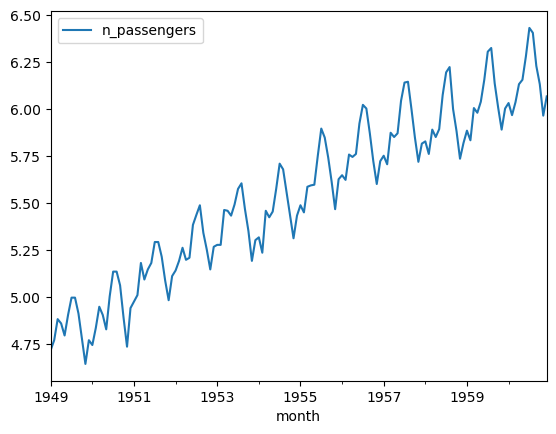

In [11]:
data_log.plot()
plt.show()

for the trend we use difference

In [12]:
data_diff = data_log.copy()
data_diff['n_passengers'] = data_diff.n_passengers.shift(12).diff()

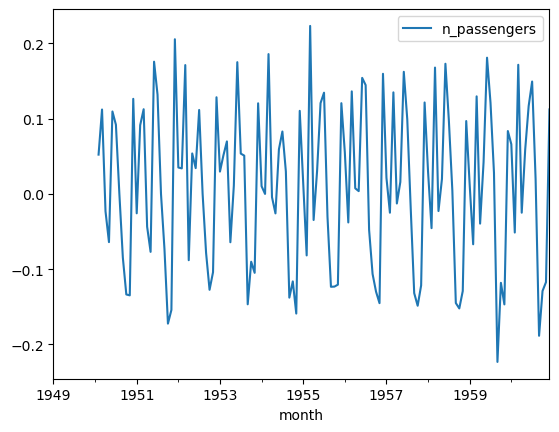

In [13]:
data_diff.plot()
plt.show()

remake the test

In [15]:
test2 = adfuller(data_diff)
test2

MissingDataError: exog contains inf or nans

we have a error because we need only int values and the have null ones

In [24]:
data_diff.head(15)

,n_passengers
month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [20]:
final_data = data_diff.dropna()

In [ ]:
test2 = adfuller(final_data)

In [23]:
test2[1] <= 0.05

True